In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
# New colormap including gridline color
colors = ['#000000','#1E93FF','#F93C31','#4FCC30','#FFDC00',
'#999999','#E53AA3','#FF851B','#87D8F1','#921231','#555555']
colormap = plt.matplotlib.colors.ListedColormap(colors)

In [3]:
base_path = './kaggle/input/arc-prize-2024/'
# Copied from the starter EDA notebook
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [4]:
training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path + 'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path + 'arc-agi_evaluation_solutions.json')

test_challenges = load_json(base_path + 'arc-agi_test_challenges.json')

In [5]:
task_ids = []
for key, value  in evaluation_challenges.items():
    task_ids.append(key)
    print(key, len(value['test']),len(value['train']))
    # for i, _ in enumerate(value['test']):
    #     print(value['test'][i]['input'])
    # for i , _ in enumerate(value['train']):
    #     print(value['train'][i]['input'])
    #     print(value['train'][i]['output'])
print(len(task_ids))

00576224 1 2
009d5c81 1 5
00dbd492 1 4
03560426 1 3
05a7bcf2 1 3
0607ce86 1 3
0692e18c 1 3
070dd51e 1 2
08573cc6 1 3
0934a4d8 1 4
09c534e7 1 3
0a1d4ef5 1 3
0a2355a6 1 4
0b17323b 1 2
0bb8deee 1 3
0becf7df 1 3
0c786b71 1 3
0c9aba6e 1 4
0d87d2a6 1 3
0e671a1a 1 4
0f63c0b9 1 4
103eff5b 1 2
11e1fe23 1 2
12422b43 1 5
12997ef3 2 4
12eac192 1 4
136b0064 1 3
13713586 1 3
137f0df0 1 3
140c817e 1 3
14754a24 1 4
15113be4 1 3
15663ba9 1 3
15696249 1 4
16b78196 1 2
17b80ad2 1 4
17cae0c1 1 4
18419cfa 1 3
184a9768 1 3
195ba7dc 1 4
1990f7a8 1 3
19bb5feb 1 3
1a2e2828 1 5
1a6449f1 1 3
1acc24af 1 4
1c02dbbe 1 3
1c0d0a4b 1 3
1c56ad9f 1 4
1d0a4b61 1 3
1d398264 2 3
1da012fc 1 2
1e81d6f9 1 3
1e97544e 1 3
2037f2c7 1 3
2072aba6 1 3
20818e16 1 3
20981f0e 1 3
212895b5 1 3
21f83797 1 2
22a4bbc2 1 4
25094a63 1 2
2546ccf6 1 2
256b0a75 1 3
2685904e 1 6
2697da3f 1 4
2753e76c 1 3
27a77e38 1 3
27f8ce4f 1 4
281123b4 1 6
292dd178 1 3
29700607 1 3
2a5f8217 1 3
2b01abd0 1 3
2c0b0aff 1 4
2c737e39 1 3
2f0c5170 1 3
310f3251 1 5

In [6]:
# Change to display other examples from the training set
example_id = 'e179c5f4'

In [7]:
# Get the grids out of the json maze and convert to tensors
toy_train_x = []
toy_train_y = []
for example in training_challenges[example_id]['train']:
    toy_train_x.append(example['input'])
    toy_train_y.append(example['output'])

toy_valid_x = []
toy_valid_y = []    

for i, example in enumerate(training_challenges[example_id]['test']):
    toy_valid_x.append(training_challenges[example_id]['test'][i]['input'])
    toy_valid_y.append(training_solutions[example_id][i])


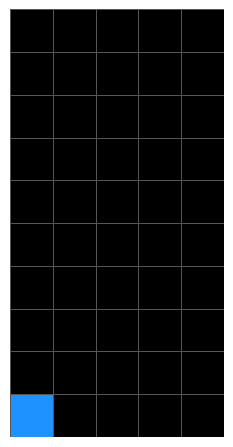

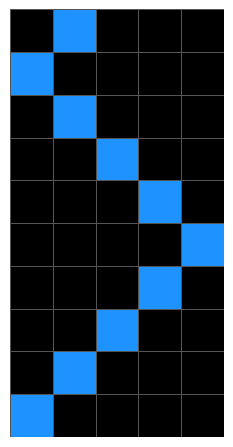

In [8]:
# Display an array of grids
def show_grids(grids):
    nrows, ncols = 1, max(5, len(grids))
    fig = plt.figure(figsize=(16,16))
    for i, grid in enumerate(grids):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
    plt.show()

show_grids(toy_valid_x)
show_grids(toy_valid_y)

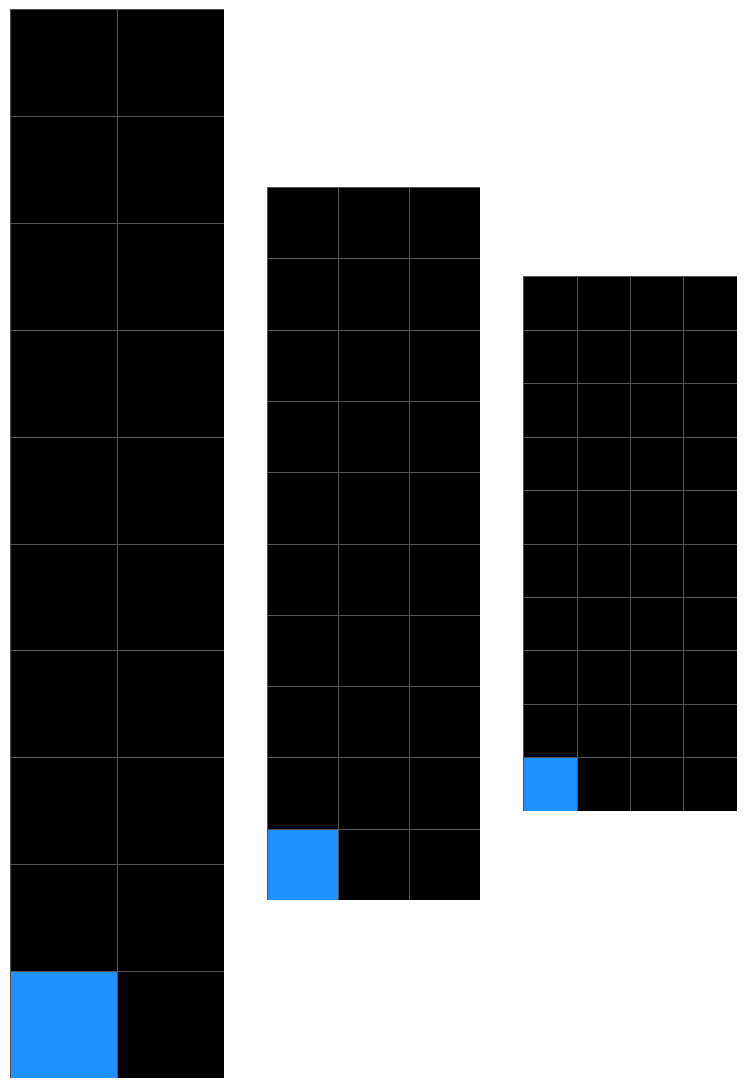

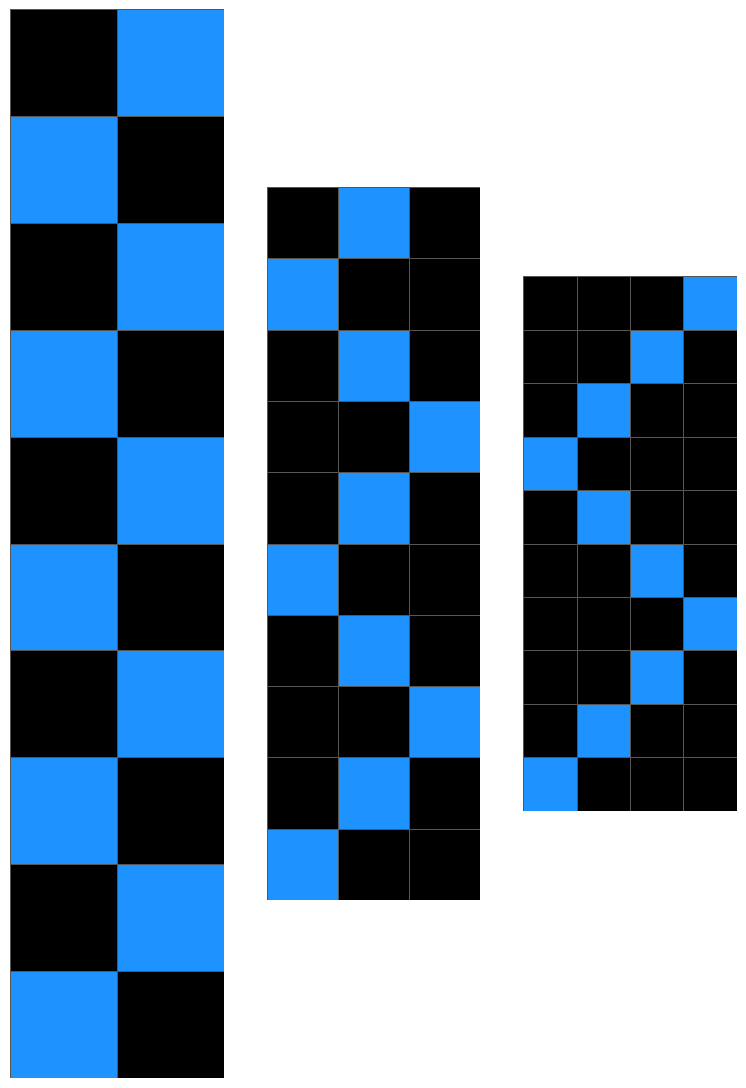

In [9]:
show_grids(toy_train_x)
show_grids(toy_train_y)
